In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

This dataset contains survey data from 157 coutries quantifying features on which happiness of a nation depends (assumed). Following are the features:

Happiness Rank: A country's rank on a world scale - determined by how high their happiness score is.

Happiness Score: A score given to a country based on adding up the rankings that a population has given to each category (normalized)

Country: The country in question

Region: The region that the country belongs too (different than continent)

Economy: GDP per capita of the country - individuals rank they quality of life based on the amount they earn

Family: quality of family life, nuclear and joint family

Health: ranking healthcare availability and average life expectancy in the country

Freedom: how much an individual is able to conduct them self based on their free will

Trust: in the government to not be corrupt

Generosity: how much their country is involved in peacekeeping and global aid

Dystopia Residual: Dystopia happiness score (1.85) i.e. the score of a hypothetical country that has a lower rank than the lowest ranking country on the report, plus the residual value of each country

In [2]:
df = pd.read_csv("happiness_project.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape

(158, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
df[df["Happiness Score"]==df["Happiness Score"].min()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


As per the survey people of Togo are the most unhappy. Let's look at India's rank out of 157 countries

In [7]:
df[df["Country"]=="India"]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513


Let's look at the number of countries in all regions where the survey was carried out

In [8]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

Let's group the countries as per regions and compare regional average scores

In [9]:
region = df.groupby(['Region'],sort = True).mean()
region

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


Let's look at regions arranged as per descending Happiness Score

In [10]:
region.sort_values(by=['Happiness Score'],ascending=False)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Western Europe,29.523810,6.689619,0.037625,1.298596,1.247302,0.909148,0.549926,0.231463,0.302109,2.151185
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769


In [11]:
region.sort_values(by=['Standard Error'])

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Western Europe,29.523810,6.689619,0.037625,1.298596,1.247302,0.909148,0.549926,0.231463,0.302109,2.151185
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


Visualization of Happiness Score as per Regions

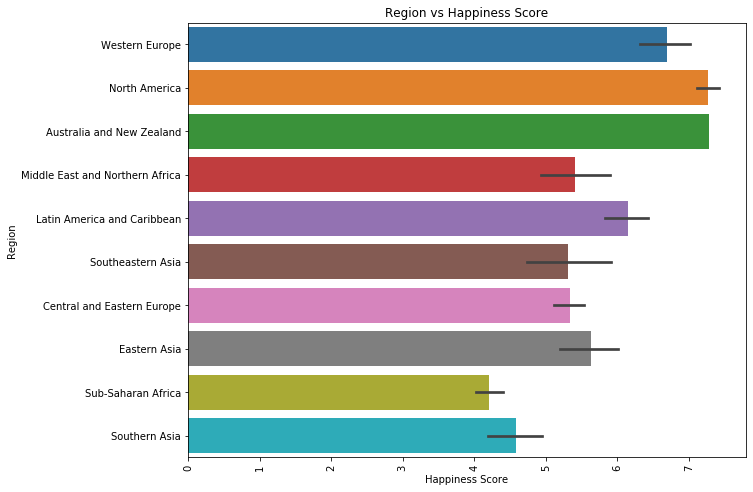

In [13]:
plt.figure(figsize= (10,8))
sns.barplot(x = df['Happiness Score'], y = df['Region'])
plt.xticks(rotation = 90) # slope of the words in the x axis 
plt.xlabel('Happiness Score')
plt.ylabel('Region')
plt.title('Region vs Happiness Score')
plt.show()

As per the graph, the inhabitants  of Australia, New Zealand and North America are the happiest and the inhabitants of Sub Saharan Africa are the least happy

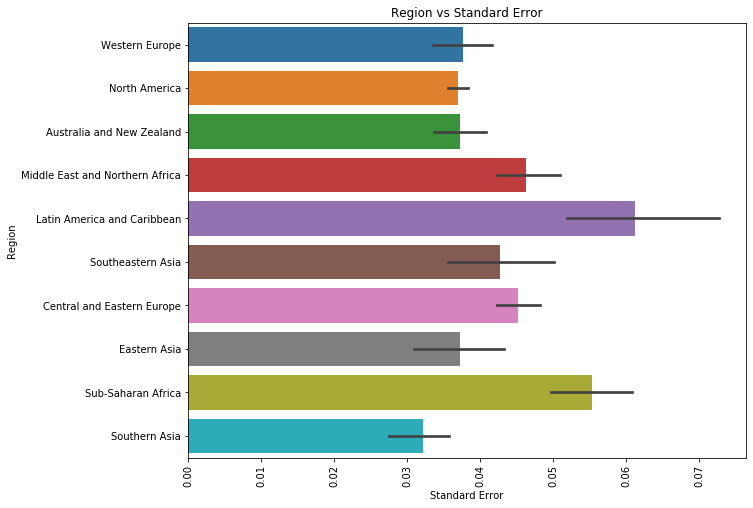

In [14]:
plt.figure(figsize= (10,8))
sns.barplot(x = df['Standard Error'], y = df['Region'])
plt.xticks(rotation = 90) # slope of the words in the x axis 
plt.xlabel('Standard Error')
plt.ylabel('Region')
plt.title('Region vs Standard Error')
plt.show()

The difference in happiness level among its inhabitants is least in the Southern Asia and most in the Latin America and Caribbean 

Let's look at the correlation matrix of the features

In [15]:
dfcor = df.corr()
dfcor

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


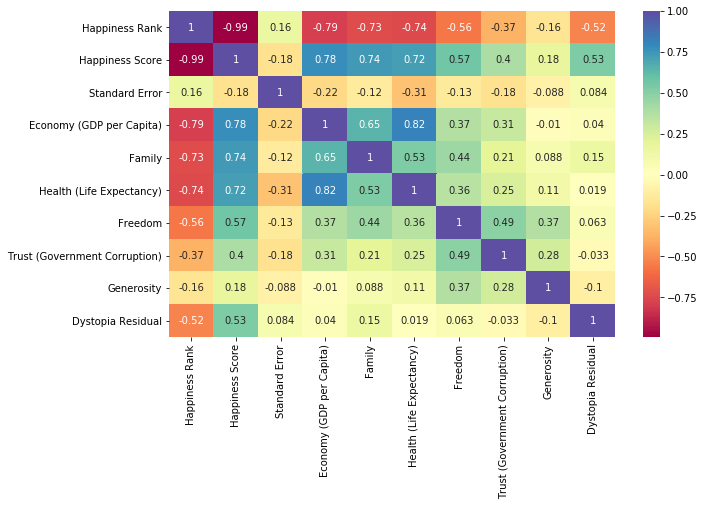

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Spectral',annot=True)

Happiness score is strongly correlated with Economy (GDP per Capita), Family (Quality of Family Life) and Health (Healthcare availability and Life Expectancy). Also happiness score is moderately correlated with Freedom and Dystopia Residual and weekly correlated with Trust in the government.
Also, Economy (GDP per Capita) is strongly correlated with Health (Healthcare availability and Life Expectancy) and Family (Quality of Family Life) as well

Let's look at all posible pair of plots for visualisation

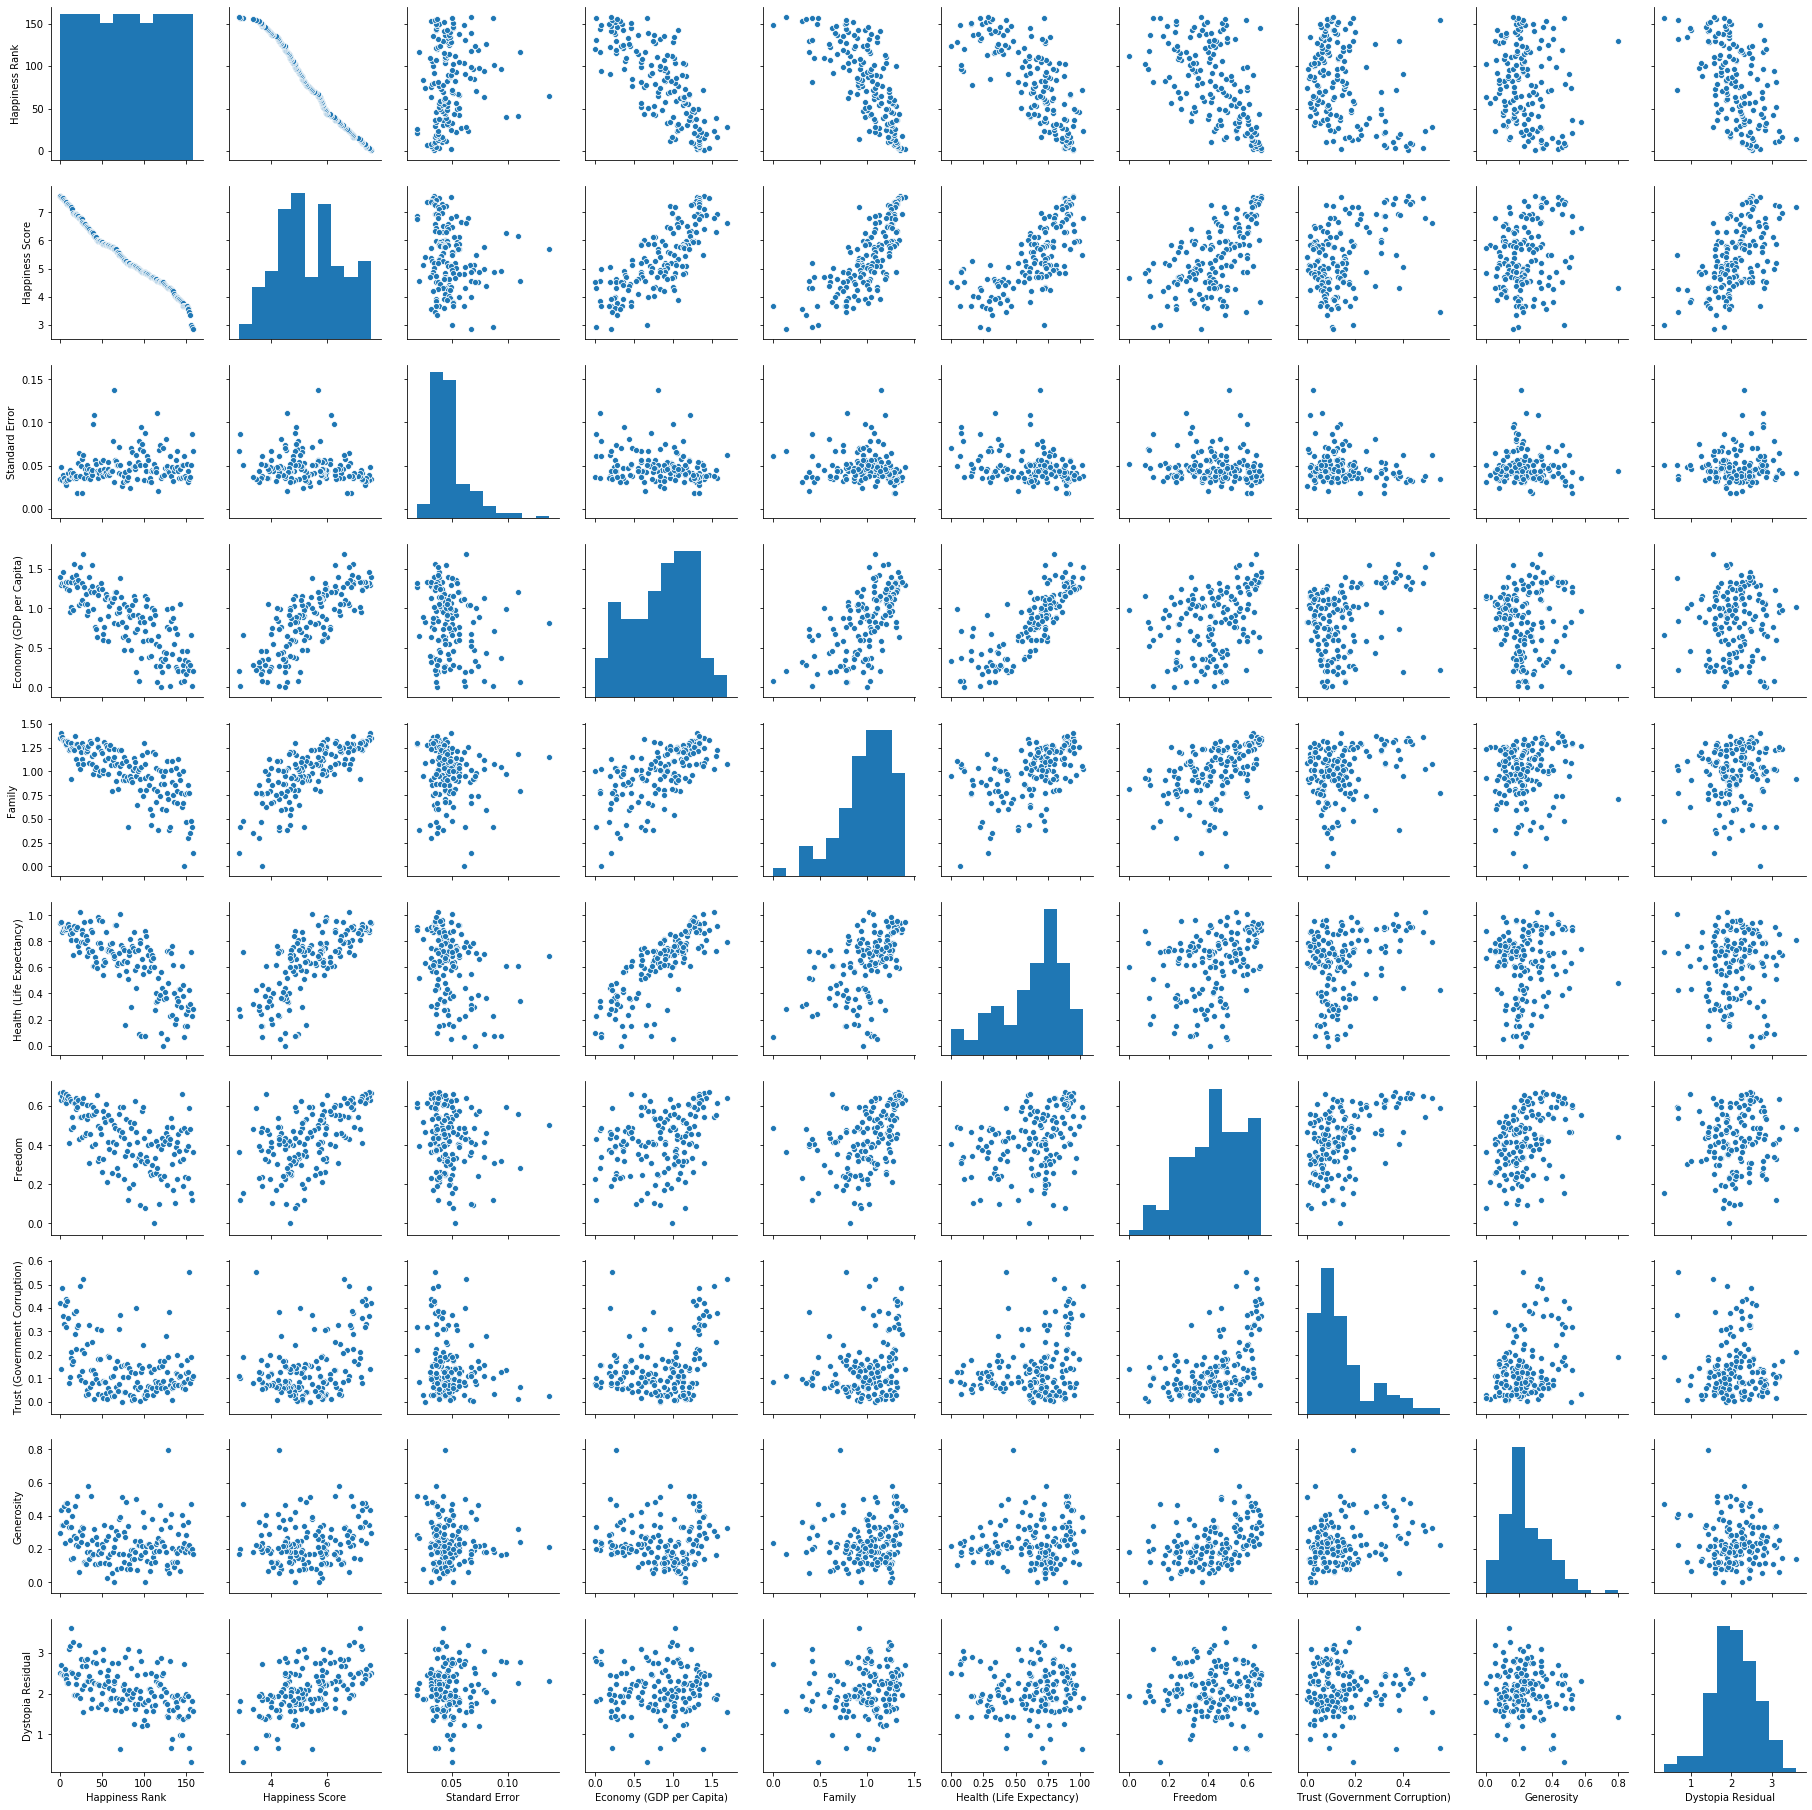

In [17]:
sns.pairplot(df)

Let's visualize the relationships using various plots

Text(0.5, 1.0, 'Economy (GDP per Capita) vs Happines Score')

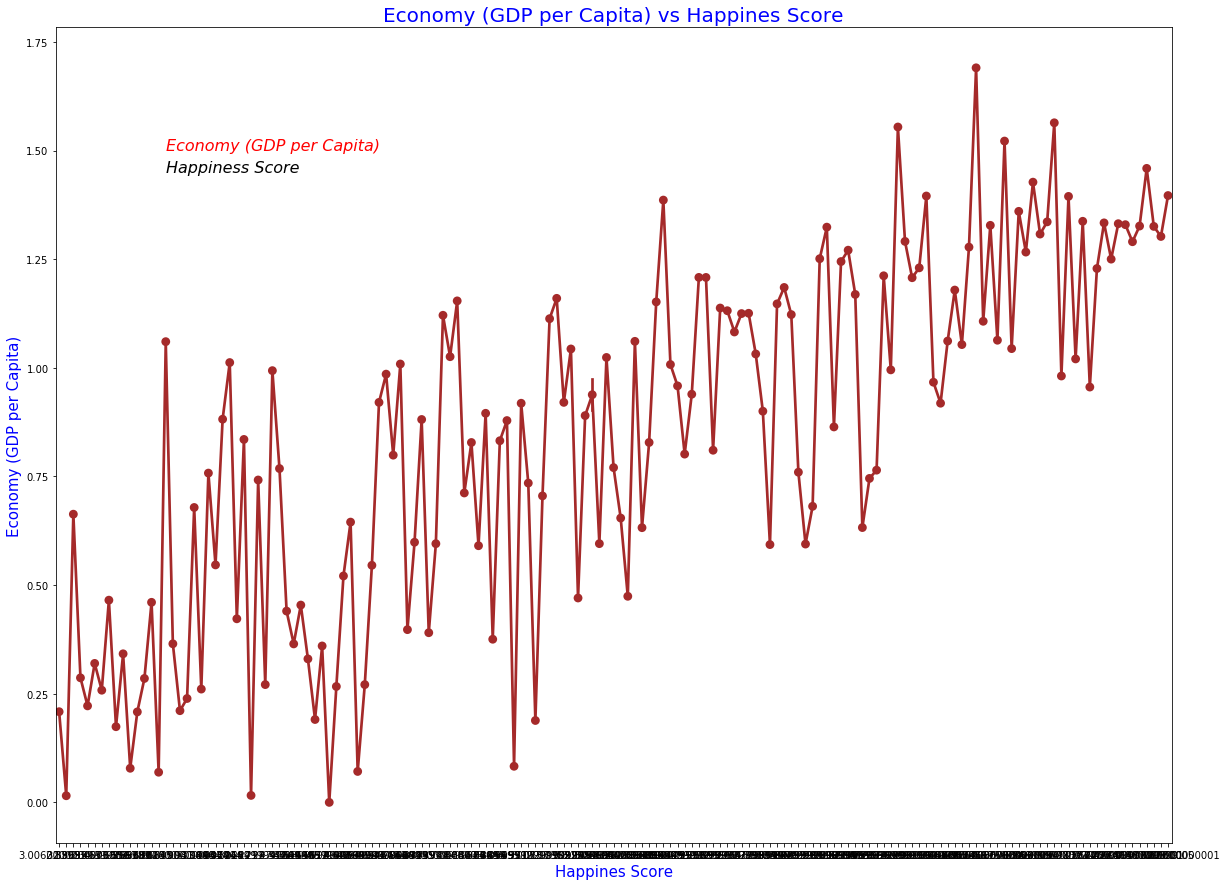

In [18]:
f, ax1 = plt.subplots(figsize=(20,15))
sns.pointplot(x='Happiness Score', y='Economy (GDP per Capita)', data=df, color='brown', alpha=0.8)
plt.text(15,1.45, 'Happiness Score', color='black', fontsize=16, style='italic')
plt.text(15,1.5, 'Economy (GDP per Capita)', color='red',fontsize=16, style='italic')
plt.xlabel('Happines Score', fontsize=15, color='blue')
plt.ylabel('Economy (GDP per Capita)', fontsize=15, color='blue')
plt.title('Economy (GDP per Capita) vs Happines Score', fontsize=20, color='blue')

Clearly Economy has a strong correlation with Happiness Score

Text(0.5, 1.0, 'Economy (GDP per Capita) vs Health (Life Expectancy)')

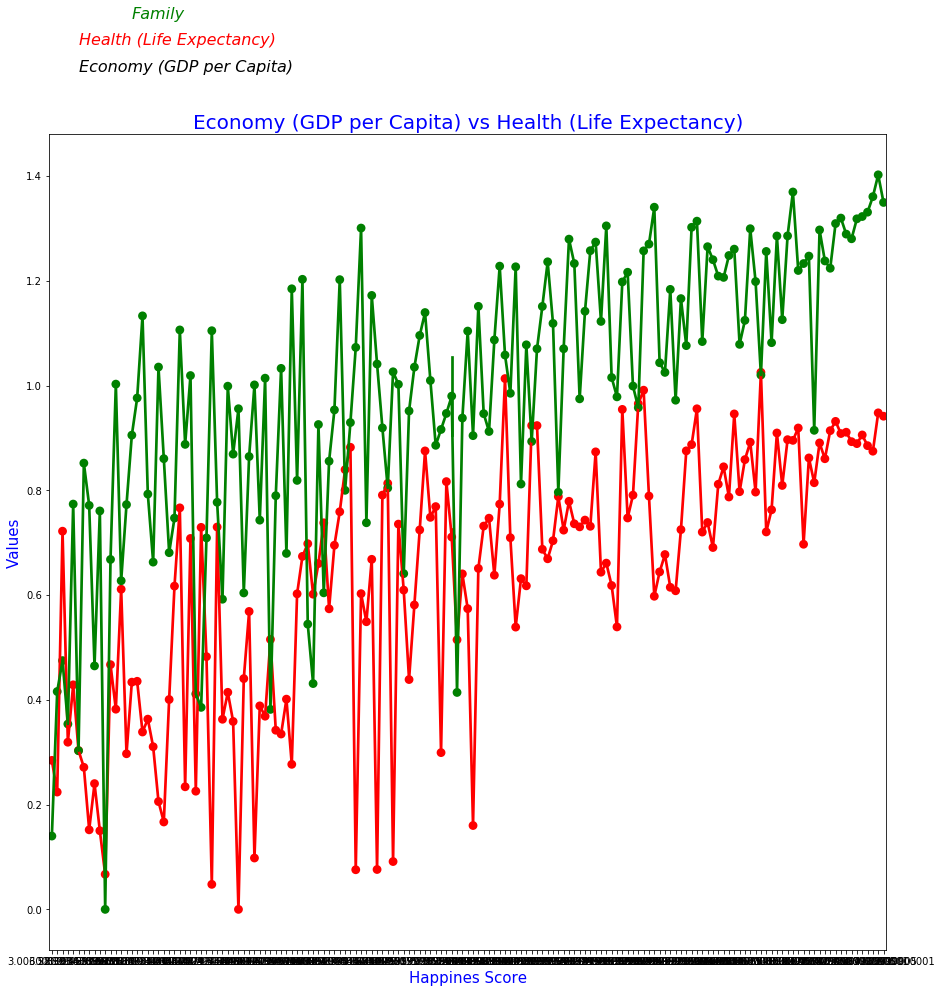

In [19]:
f, ax1 = plt.subplots(figsize=(15,15))
sns.pointplot(x='Happiness Score', y='Health (Life Expectancy)', data=df, color='red', alpha=1)
sns.pointplot(x='Happiness Score', y='Family', data=df, color='green', alpha=1)
plt.text(5,1.60, 'Economy (GDP per Capita)', color='black', fontsize=16, style='italic')
plt.text(5,1.65, 'Health (Life Expectancy)', color='red',fontsize=16, style='italic')
plt.text(15,1.70, 'Family', color='green',fontsize=16, style='italic')
plt.xlabel('Happines Score', fontsize=15, color='blue')
plt.ylabel('Values', fontsize=15, color='blue')
plt.title('Economy (GDP per Capita) vs Health (Life Expectancy)', fontsize=20, color='blue')

Also, Health (Healthcare availability and life expectancy) and Qaulity of family life are strongly correlated with Happiness Score. 
Let's look at the linear regression model between Happiness Score and Economy (GDP per Capita)

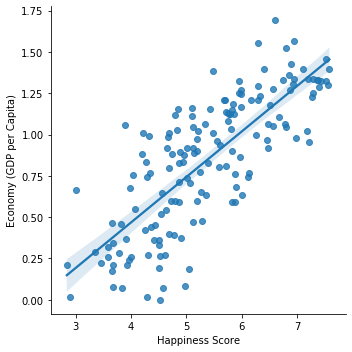

In [20]:
sns.lmplot(x='Happiness Score', y='Economy (GDP per Capita)', data=df)
plt.show()

Economy (GDP per Capita) and Health (Life Expectancy) have the highest correlation coefficuent (0.82) in the dataset.

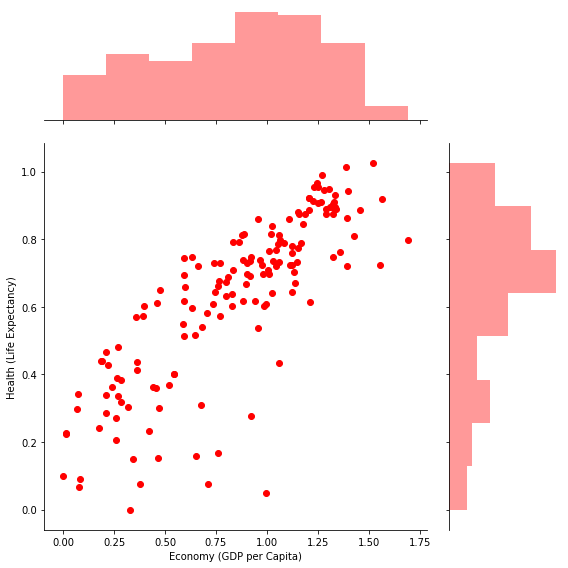

In [21]:
sns.jointplot(df['Economy (GDP per Capita)'], df['Health (Life Expectancy)'], kind='scatter', size=8, ratio=3, color='r')
plt.show()

The above plot also shows the distribution of individual features. Checking the kernel density in the plot Happiness Score vs Economy (GDP per Capita)

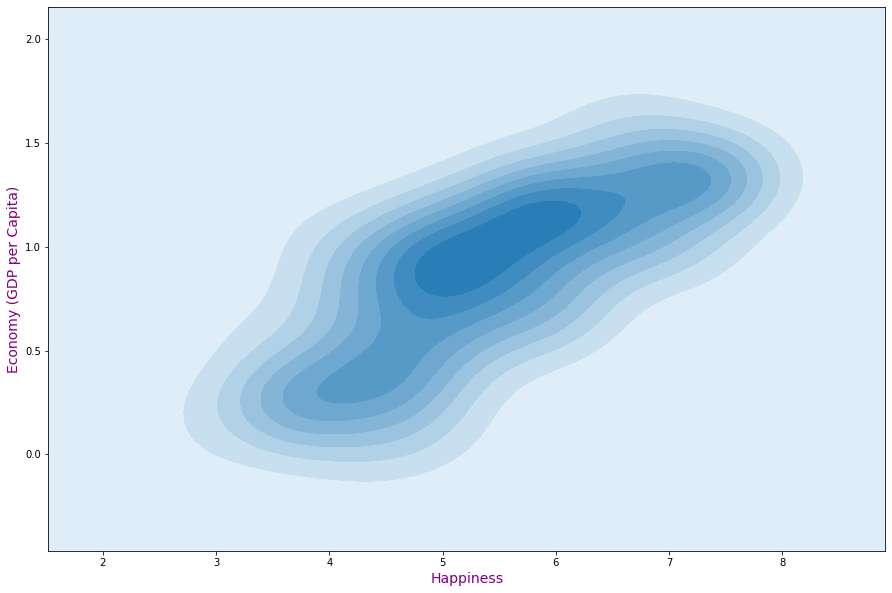

In [22]:
plt.subplots(figsize=(15,10))
sns.kdeplot(df['Happiness Score'], df["Economy (GDP per Capita)"], shade=True, cut=3)
plt.xlabel('Happiness', color='purple', fontsize=14)
plt.ylabel('Economy (GDP per Capita)', color='purple', fontsize=14)
plt.show()

Making violin plot for the features

In [23]:
data1 = df["Happiness Score"] # Trust..Government.Corruption.
data2 = df["Economy (GDP per Capita)"] # Economy..GDP.per.Capita.
newdata = pd.concat([data1,data2],axis=1) # create new data
newdata

,Happiness Score,Economy (GDP per Capita)
0,7.587,1.39651
1,7.561,1.30232
2,7.527,1.32548
3,7.522,1.45900
4,7.427,1.32629
...,...,...
153,3.465,0.22208
154,3.340,0.28665
155,3.006,0.66320
156,2.905,0.01530


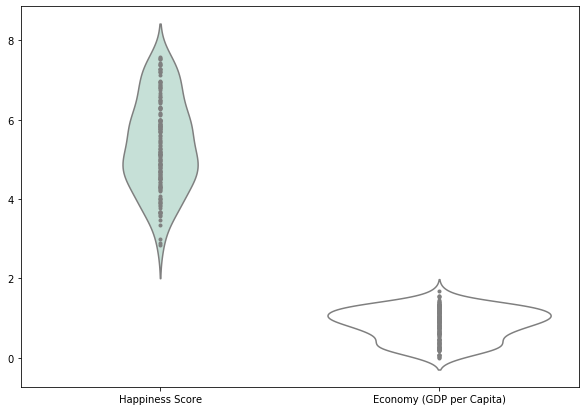

In [24]:
plt.subplots(figsize=(10,7))
pal = sns.cubehelix_palette(2, rot=-5, dark=3)
sns.violinplot(data=newdata, palette=pal, inner='points') # data uses only numbers but not strings
plt.show()

Let's assume countries ranking from rank 1 to rank 40 are Happy, from rank 41 to rank 90 are Less Happy and from rank 91 to rank 157 are Less Happy

In [25]:
df['Happines_level'] = ['Happy' if x<=40 else 'Less Happy' if x<=90 else 'Unhappy' for x in df['Happiness Rank']]

Let's assume countries above 75 percentiles in terms of Economy (GDP per Capita) are rich, between 45 and 75 percentiles are middle class and below 45 percentile are poor

In [26]:
df['Economy (GDP per Capita)'].quantile(0.45)

0.8539470000000002

In [27]:
df['Economy (GDP per Capita)'].quantile(0.75)

1.1584475

In [28]:
df['Economy_level'] = ['Rich' if eco>1.158 else 'Middle Class' if eco>0.853 else 'Poor' 
                         for eco in df['Economy (GDP per Capita)']]

In [29]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happines_level,Economy_level
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Happy,Rich
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Happy,Rich
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Happy,Rich
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Happy,Rich
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Happy,Rich


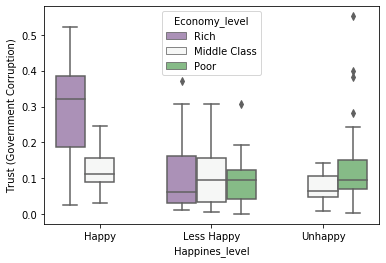

In [30]:
sns.boxplot(x="Happines_level", y="Trust (Government Corruption)", hue='Economy_level', data=df, palette="PRGn")
plt.show()

This plot shows that rich and happy nations have a relatively higher trust on their government

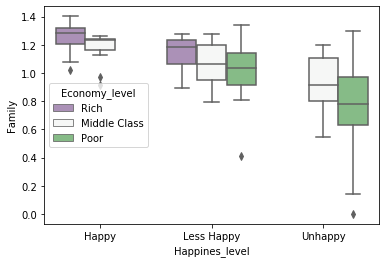

In [31]:
sns.boxplot(x="Happines_level", y="Family", hue='Economy_level', data=df, palette="PRGn")
plt.show()

This plot shows that inhabitants of rich and happy nations have the highest quality of family life

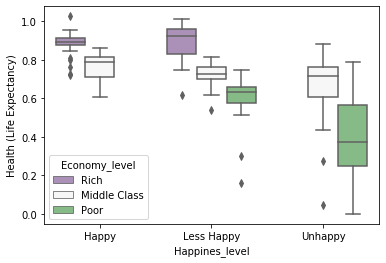

In [32]:
sns.boxplot(x="Happines_level", y="Health (Life Expectancy)", hue='Economy_level', data=df, palette="PRGn")
plt.show()

The above plot shows that rich nations have the highest Healthcare avilability and life expectancy

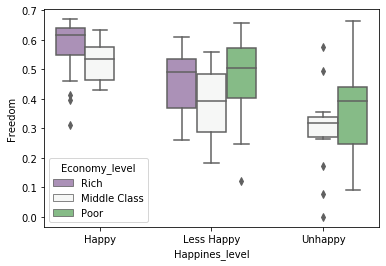

In [33]:
sns.boxplot(x="Happines_level", y="Freedom", hue='Economy_level', data=df, palette="PRGn")
plt.show()

The above plot shows that citizens of rich and happy nations have more freedom to act according to their will

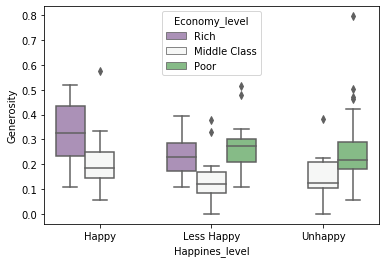

In [34]:
sns.boxplot(x="Happines_level", y="Generosity", hue='Economy_level', data=df, palette="PRGn")
plt.show()

The above plot shows that most poor nations are paying more than middle class countries and even more than some rich countries towards world peace keeping and global aid

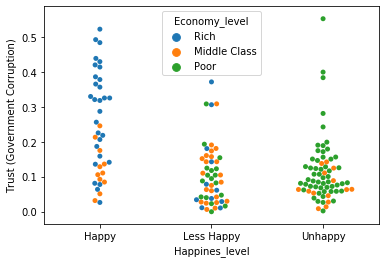

In [35]:
sns.swarmplot(x="Happines_level", y="Trust (Government Corruption)",hue="Economy_level", data=df)
plt.show()

(array([ 7., 17., 14., 14., 19., 24., 26., 26.,  7.,  4.]),
 array([0.      , 0.169042, 0.338084, 0.507126, 0.676168, 0.84521 ,
        1.014252, 1.183294, 1.352336, 1.521378, 1.69042 ]),
 <a list of 10 Patch objects>)

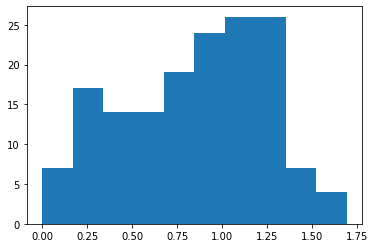

In [36]:
plt.hist(df["Economy (GDP per Capita)"])

Clearly the Economy (GDP per Capita) distribution is skewed towards left

(array([ 3., 10., 13., 25., 28., 12., 26., 14., 12., 15.]),
 array([2.839 , 3.3138, 3.7886, 4.2634, 4.7382, 5.213 , 5.6878, 6.1626,
        6.6374, 7.1122, 7.587 ]),
 <a list of 10 Patch objects>)

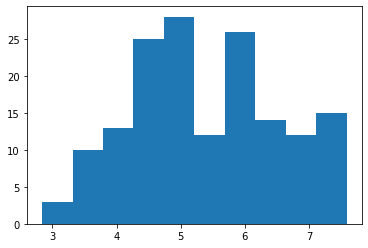

In [37]:
plt.hist(df["Happiness Score"])

(array([ 2.,  4.,  4., 20., 37., 36., 28., 18.,  8.,  1.]),
 array([0.32858 , 0.655936, 0.983292, 1.310648, 1.638004, 1.96536 ,
        2.292716, 2.620072, 2.947428, 3.274784, 3.60214 ]),
 <a list of 10 Patch objects>)

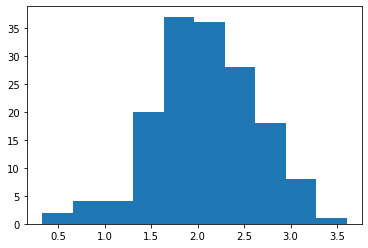

In [38]:
plt.hist(df["Dystopia Residual"])

In [39]:
#Checking for null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happines_level                   0
Economy_level                    0
dtype: int64

Clearly there is no missing value also confirmed by the heatmap

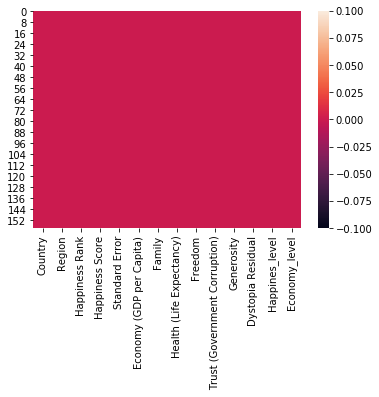

In [40]:
sns.heatmap(df.isnull())

Dropping categorical columns for regression models

In [41]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happines_level,Economy_level
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Happy,Rich
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Happy,Rich
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Happy,Rich
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Happy,Rich
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Happy,Rich


In [42]:
df.drop(["Country","Region","Happiness Rank","Standard Error","Happines_level","Economy_level"], axis=1, inplace=True)
df.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [43]:
#Checking skewness in the data
df.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [44]:
y = df["Happiness Score"]
X = df.drop(["Happiness Score"], axis =1)

In [45]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [46]:
X.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Finding best random_state for Linear Regression Model

In [47]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 54 is 0.9999999574733979


In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30,random_state=54)

In [49]:
print(X_train.shape,"\n",X_test.shape)

(110, 7) 
 (48, 7)


In [50]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [51]:
LR = LinearRegression()
RR = Ridge(alpha=0.1)
LSR = Lasso()
KNR = KNeighborsRegressor(n_neighbors=4)#(n_neighbors=2)
SV = SVR(kernel='rbf',C=100)
DTC = DecisionTreeRegressor(random_state=99)
RFC = RandomForestRegressor(n_estimators = 500,random_state = 99)
ABC = AdaBoostRegressor()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 240,random_state=99)
XGB = xgb.XGBRegressor(random_state=99)

In [52]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
models.append(("XGBoostRegressor", XGB))

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
Model = []
score = []
cvs = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    print("\n")
    sc = cross_val_score(model,X,y,cv=10,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
    print("Mean Squared error\n", mean_squared_error(y_test,pre))
    print("\n")
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error \n{}".format(mae))
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  0.9999999574733979


Cross val score =  0.9999916588843147


Mean Squared error
 6.654039612866773e-08


Mean absolute error 
0.0002178947426476526



***************** Ridge ******************

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.9999037916641635


Cross val score =  0.9937801771106163


Mean Squared error
 0.00015053497012457992


Mean absolute error 
0.009016857961654698



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  -0.005908919817762426


Cross val score =  -67.88244292260013


Mean Squared error
 1.5739225491873279


In [55]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs})
result

,Model,R2 Socre,Cross val score
0,LinearRegression,1.000000,99.999166
1,Ridge,0.999904,99.378018
2,Lasso,-0.005909,-6788.244292
3,KNeighborsRegressor,0.925177,-624.822670
4,SVR,0.979482,6.397934
5,DecisionTreeRegressor,0.724831,-2133.043128
6,RandomForestRegressor,0.845860,-704.615845
7,AdaBoostRegressor,0.814199,-1487.208057
8,GradientBoostingRegressor,0.903252,-514.193440
9,XGBoostRegressor,0.894142,-742.046778


Hyperparameter tuning using GridsearchCV

In [56]:
from sklearn.model_selection import GridSearchCV
neighbors = {"n_neighbors":range(1,7)}
gknr = GridSearchCV(KNR,neighbors,cv=10)
gknr.fit(X,y)
gknr.best_params_

{'n_neighbors': 4}

Let's search for best parameters for RandomForestRegressor

In [149]:
parameters = {'max_depth': [2,3,4,5,6,7,8],
              'n_estimators': [100,200,300,400,500,600]
             }
model = RandomForestRegressor()
grid = GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.max_depth)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
parameters = {'learning_rate': [0.2,0.3,0.4,0.5,0.6,0.7,0.8],
              'n_estimators': [100,200,300,400,500,600]
             }
model = GradientBoostingRegressor()
grid = GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.learning_rate)
print(grid.best_params_)

In [ ]:
from sklearn.externals import joblib
joblib.dump(LR,'Happiness_Regression.csv')

In [ ]:
model = joblib.load("Happiness_Regression.csv")
model.predict(X_test)